In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
from neural_network import Layer

In [3]:
size = 300
r = 6
# blob 1
x = np.random.normal(4,2,(size))
y = np.random.normal(1,2,(size))
# blob 2
x2 = np.zeros(size)
y2 = np.zeros(size)
for i in range(size):
    x2[i] = 4+r*math.cos(2*math.pi*(i/size))# + 
    y2[i] = 1+r*math.sin(2*math.pi*(i/size))# + 
x2+=np.random.normal(0,1.5,(size))
y2+=np.random.normal(0,1.5,(size))

x = np.concatenate((x,x2))
y = np.concatenate((y,y2))
# add xy together 
X = np.hstack((x,y)).reshape(2,2*size).T
# reuse y for flags
y[:size] = 1
y[size:] = 0

#shuffle
mask = np.random.permutation(len(X))
X = X[mask]
y = y[mask]

In [4]:
# data
s = size//2
# test set
# blob 1
tx = np.random.normal(4,1.5,s)
ty = np.random.normal(1,1.5,s)
# blob 2
tx2 = np.zeros(s)
ty2 = np.zeros(s)
for i in range(s):
    tx2[i] = 4+r*math.cos(2*math.pi*(i/s))# + 
    ty2[i] = 1+r*math.sin(2*math.pi*(i/s))# + 
tx2+=np.random.normal(0,1,s)
ty2+=np.random.normal(0,1,s)

tx = np.concatenate((tx,tx2))
ty = np.concatenate((ty,ty2))
# add xy together, add intercept 
tX = np.hstack((tx,ty)).reshape(2,size).T
# reuse y for flags
ty[:s] = 1
ty[s:] = -1

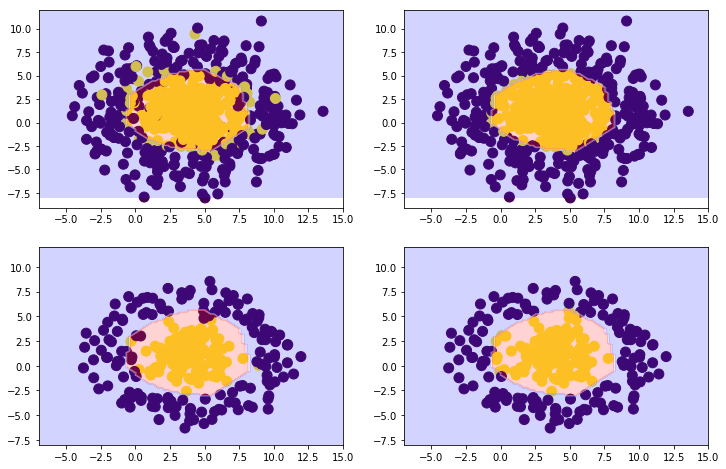

In [34]:
xxx = np.linspace(-7,15,100)
yyy = np.linspace(-8,12,100)
xx, yy = np.meshgrid(xxx,yyy)
Z = predict(net,np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(12,8))
axes[0][0].scatter(X[:,0],X[:,1],c=y,s=100)
axes[1][0].scatter(tX[:,0],tX[:,1],c=ty,s=100)
axes[0][0].contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
axes[1][0].contourf(xx,yy,Z,alpha=0.2,cmap='bwr')

pred = predict(net,X)
tpred = predict(net,tX)
axes[0][1].scatter(X[:,0],X[:,1],c=pred,s=100)
axes[1][1].scatter(tX[:,0],tX[:,1],c=tpred,s=100)
axes[0][1].contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
axes[1][1].contourf(xx,yy,Z,alpha=0.2,cmap='bwr')
plt.show()

In [19]:
def build_network(*layers,output_type='classification'):
    network = []
    prev = Layer(layers[0])
    network.append(prev)
    for l in layers[1:-1]:
        curr = Layer(l,prev,activation='ReLU')
        network.append(curr)
        prev = curr
    if (output_type=='classification'):
        network.append(Layer(layers[-1],prev,activation='sigmoid'))
    else:
        network.append(Layer(layers[-1],prev,activation='none'))
    return network

In [21]:
def train_network(network, X, y, epochs,learning_rate=0.001):
    for epoch in range(epochs):
        for i in range(len(X)):
            network[0].feed_forward(X[i])
            network[-1].back_propagate(y[i],learning_rate)   

In [32]:
def predict(network, X,output_type='classification'):
    n = network[-1].n
    pred = np.zeros((len(X),n))
    for i in range(len(X)):
        p = network[0].feed_forward(X[i])
        if (output_type=='classification'):
            pred[i] = (p>=0.5)
        else:
            pred[i] = p
    if n==1:
        pred = pred.ravel()
    return pred

In [22]:
net = build_network(2,16,16,1)
train_network(net, X, y, 200)

In [5]:
a = Layer(2,name='a')

In [6]:
b = Layer(16,a,activation='ReLU',name='b')
c = Layer(16,b,activation='ReLU',name='c')

In [7]:
d = Layer(1,c,activation='sigmoid',name='d')

In [8]:
for epoch in range(50):
    for i in range(len(X)):
        a.feed_forward(X[i])
        d.back_propagate(y[i],learning_rate=0.001)

In [ ]:
import math
spiral = np.random.normal(0,1,(1000,2))
flag = np.zeros((1000))

for i in range(1000):
    x = spiral[i,0]
    y = spiral[i,1]
    
    if (2*math.tanh(x*2)>y):
        if (math.tanh(x)<y):
            flag[i] =1
    if (2*math.tanh(x*2)<-y):
        if (math.tanh(x)>-y):
            flag[i] =1

In [ ]:
a = Layer(2,name='a')
b = Layer(16,a,activation='ReLU',name='b')
c = Layer(16,b,activation='ReLU',name='c')
d = Layer(1,c,activation='sigmoid',name='d')

In [ ]:
for epoch in range(100):
    for i in range(len(spiral)):
        a.feed_forward(spiral[i])
        d.back_propagate(flag[i],learning_rate=0.001)

In [ ]:
xxx = np.linspace(-4,4,100)
yyy = np.linspace(-4,4,100)
xx, yy = np.meshgrid(xxx,yyy)
Z = predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))

plt.scatter(spiral[:,0],spiral[:,1],c=flag)
plt.contourf(xx,yy,Z,alpha=0.2,cmap='bwr')

plt.show()

In [ ]:
import math
ying = np.random.normal(0,1,(1000,2))
yang = np.zeros((1000))

for i in range(1000):
    x = ying[i,0]
    y = ying[i,1]
    
    if (math.atan2(y,x)-0.8*(x**2+y**2)<x**2+y**2<math.atan2(y,x)+0.2*(x**2+y**2)):
            yang[i] =1
    if (-math.atan2(y,-x)-0.8*(x**2+y**2)<x**2+y**2<-math.atan2(y,-x)+0.2*(x**2+y**2)):
            yang[i] =1

In [ ]:
plt.scatter(ying[:,0],ying[:,1],c=yang)

In [ ]:
for epoch in range(500):
    for i in range(len(ying)):
        a.feed_forward(ying[i])
        d.back_propagate(yang[i],learning_rate=0.001)

In [ ]:
xxx = np.linspace(-4,4,100)
yyy = np.linspace(-4,4,100)
xx, yy = np.meshgrid(xxx,yyy)
Z = predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape((xx.shape))

plt.scatter(ying[:,0],ying[:,1],c=yang)
plt.contourf(xx,yy,Z,alpha=0.2,cmap='PuBu')

plt.show()